In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklego.linear_model import LowessRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [19]:
data = pd.read_csv('kc_house_data.csv')
data.drop(['id','date'],axis=1,inplace=True)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [14]:
x = data.iloc[:100,1:]
y=data.iloc[:100,0]
le = LabelEncoder()
x = x.apply(le.fit_transform)
ss = StandardScaler()
x = ss.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [15]:
lr = LowessRegression(sigma=0.5,span=0.5)
model=lr.fit(x_train,y_train)
y_pred = model.predict(x_test)


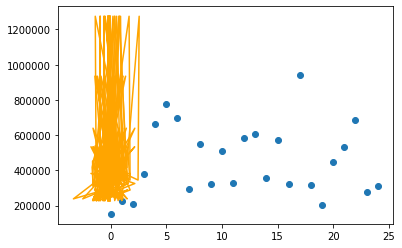

In [16]:
plt.scatter(range(len(y_test)),y_test)
plt.plot(x_test,y_pred,color='orange')

In [17]:
y_test,y_pred

(92    153000.0
 50    228000.0
 46    210490.0
 76    380000.0
 10    662500.0
 41    775000.0
 94    700000.0
 7     291850.0
 36    550000.0
 9     323000.0
 4     510000.0
 24    329000.0
 53    585000.0
 3     604000.0
 83    356000.0
 72    571000.0
 34    322500.0
 85    940000.0
 84    315000.0
 68    204000.0
 48    450000.0
 33    535000.0
 32    687500.0
 31    280000.0
 12    310000.0
 Name: price, dtype: float64,
 array([ 230093.03277136,  288890.66072692,  228649.00946909,
         431123.96773574, 1275133.24298251,  345144.13180474,
         430046.09986802,  288918.74179614,  238510.32891658,
         372389.31948926,  399835.42106781,  374567.65044253,
         382817.11645102,  325668.31112034,  255331.80039277,
         639631.96907369,  345734.95615087,  934984.75147242,
         417758.9454001 ,  310693.58456857,  452011.57421312,
         538058.49208711,  387574.55336157,  533950.8764982 ,
         377353.29820057]))